In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
games_1920 = pd.read_csv('CSV_Season_2019_2020/games.csv')
games_1920 = games_1920[(games_1920['GAME_DATE_EST']> "2019-10-22") & (games_1920['GAME_DATE_EST']< "2020-08-14")]
games_1920.count()

min_games_1920__df = games_1920[["GAME_ID", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "PTS_home", "FG_PCT_home", "FT_PCT_home", "FG3_PCT_home",
                         "AST_home", "REB_home", "PTS_away", "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", 
                         "REB_away"]]

ren_games_1920__df = min_games_1920__df.rename(columns={"GAME_ID":"Game ID",
                                            "HOME_TEAM_ID": "Team ID Home", 
                                            "VISITOR_TEAM_ID": "Team ID Away", 
                                            "PTS_home": "Points Home", 
                                            "FG_PCT_home": "Field Goals % Home", 
                                            "FT_PCT_home": "Free Throws % Home", 
                                            "FG3_PCT_home": "3 Pt Field Goals % Home",
                                            "AST_home": "Assists Home", 
                                            "REB_home": "Rebounds Home", 
                                            "PTS_away": "Points Away", 
                                            "FG_PCT_away": "Field Goals % Away", 
                                            "FT_PCT_away": "Free Throws % Away", 
                                            "FG3_PCT_away": "3 Pt Field Goals % Away", 
                                            "AST_away": "Assists Away",
                                            "REB_away": "Rebounds Away",
                                           })
ren_games_1920__df
ren_games_1920__df.to_csv("CSV_Season_2019_2020/games_clean.csv")

In [3]:
games_details_1920 = pd.read_csv('CSV_Season_2019_2020/games_details.csv')
games_details_1920_inner_join = pd.merge(games_details_1920, games_1920, on ='GAME_ID', how = 'inner')

games_details_1920_inner_join

min_games_details_df = games_details_1920_inner_join[["TEAM_ID", "TEAM_ABBREVIATION", "TEAM_CITY", "PLAYER_ID", "START_POSITION", "MIN", 
                                         "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FTM", "FTA", "FT_PCT", "REB", "AST", "PF", 
                                         "PTS"]]

ren_games_details_df = min_games_details_df.rename(columns={"TEAM_ID":"Team ID", 
                                                            "TEAM_ABBREVIATION":"Team Abbr", 
                                                            "TEAM_CITY": "City", 
                                                            "PLAYER_ID":"Player ID", 
                                                            "START_POSITION": "Position", 
                                                            "MIN":"Minutes", 
                                                            "FGM":"Field Goals Made", 
                                                            "FGA":"Field Goals Attempted", 
                                                            "FG_PCT":"Fiels Goals %",
                                                            "FG3M":"3 Pt Field Goals Made", 
                                                            "FG3A":"3 Pt Field Goals Attempted", 
                                                            "FG3_PCT":"3 Pt Field Goals %", 
                                                            "FTM":"Free Throws Made", 
                                                            "FTA":"Free Throws Attempted", 
                                                            "FT_PCT":"Free Throws %", 
                                                            "REB":"Rebounds", 
                                                            "AST":"Assists", 
                                                            "PF":"Personal Fouls", 
                                                            "PTS":"Points"
                                                           })
ren_games_details_df
ren_games_details_df.to_csv("CSV_Season_2019_2020/games_details_clean.csv")

In [4]:
#games = pd.read_csv('Clean/games_clean.csv')
games = pd.read_csv('CSV_Season_2019_2020/games_clean.csv')
players = pd.read_csv('Clean/players_clean.csv')
teams = pd.read_csv('Clean/teams_clean.csv')
ranking = pd.read_csv('Clean/ranking_clean.csv')
#games_details = pd.read_csv('Clean/games_details_clean.csv')
games_details = pd.read_csv('CSV_Season_2019_2020/games_details_clean.csv')
players = players[["Player ID", "Player", "Team ID"]]
players

,Player ID,Player,Team ID
0,1626220,Royce O'Neale,1610612762
1,202711,Bojan Bogdanovic,1610612762
2,203497,Rudy Gobert,1610612762
3,1628378,Donovan Mitchell,1610612762
4,201144,Mike Conley,1610612762
...,...,...,...
7223,201831,Lanny Smith,1610612758
7224,201999,Warren Carter,1610612752
7225,201834,Bennet Davis,1610612751
7226,201646,Brian Hamilton,1610612751


In [5]:






ranking.drop_duplicates(subset='Team ID', keep='first', inplace=True)

ranking.head()


,Unnamed: 0,Team ID,Conference,Team,Games,Wins,Losses,Wins %,Record Home,Record Away
0,0,1610612762,West,Utah,72,52,20,0.722,31-5,21-15
1,1,1610612756,West,Phoenix,72,51,21,0.708,27-9,24-12
2,2,1610612743,West,Denver,72,47,25,0.653,25-11,22-14
3,3,1610612746,West,LA Clippers,72,47,25,0.653,26-10,21-15
4,4,1610612742,West,Dallas,72,42,30,0.583,21-15,21-15


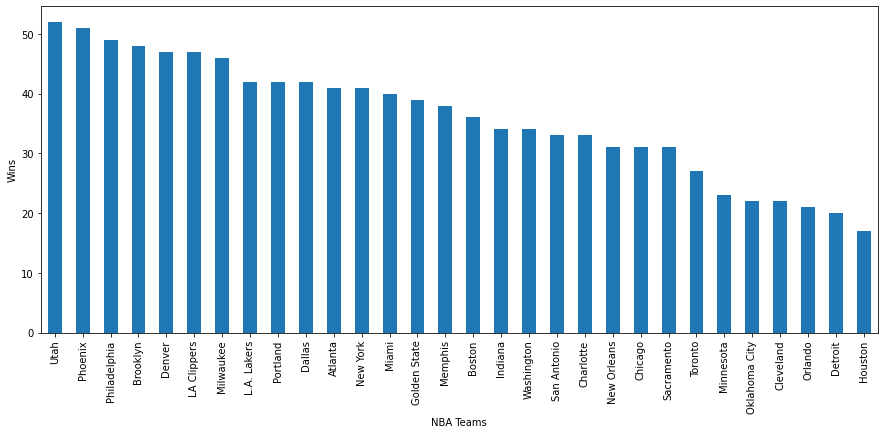

In [6]:
ranking.groupby('Team').Wins.sum().sort_values(ascending=False).plot.bar(figsize=(15,6))
plt.title = ("Winnings")
plt.xlabel("NBA Teams")
plt.ylabel("Wins")
plt.show()

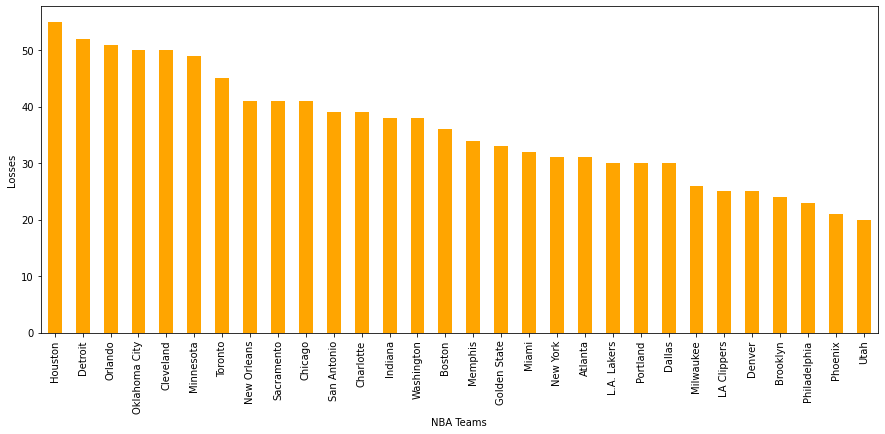

In [7]:
ranking.groupby('Team').Losses.sum().sort_values(ascending=False).plot.bar(figsize=(15,6), color='orange')
plt.xlabel("NBA Teams")
plt.ylabel("Losses")
plt.show()

In [8]:
players_details_df = games_details.groupby(['Player ID']).sum("Points").sort_values("Points", ascending=False)


In [9]:

players_details_df


,Unnamed: 0,Team ID,Field Goals Made,Field Goals Attempted,Fiels Goals %,3 Pt Field Goals Made,3 Pt Field Goals Attempted,3 Pt Field Goals %,Free Throws Made,Free Throws Attempted,Free Throws %,Rebounds,Assists,Personal Fouls,Points
Player ID,,,,,,,,,,,,,,,
201935,972768,114353504895,686.0,1544.0,31.135,311.0,863.0,25.352,715.0,828.0,59.879,463.0,527.0,237.0,2398.0
203081,1005166,120795956775,625.0,1354.0,30.281,271.0,679.0,25.045,461.0,519.0,57.557,286.0,537.0,115.0,1982.0
203507,934711,107911054183,704.0,1273.0,36.841,92.0,304.0,19.330,424.0,665.0,41.453,876.0,367.0,205.0,1924.0
1626164,1003205,122406569456,640.0,1318.0,34.942,145.0,414.0,23.936,477.0,520.0,64.931,309.0,475.0,223.0,1902.0
1629029,870165,104689828230,601.0,1293.0,29.312,174.0,553.0,18.790,440.0,583.0,48.371,596.0,559.0,156.0,1816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,74004,4831838271,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1629685,5466,1610612739,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1629716,35951,6442450956,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,2.0,0.0,1.0,0.0


In [11]:
games_and_player_merger = pd.merge(players_details_df,players , on="Player ID", how="inner")
games_and_player_merger = games_and_player_merger[["Player ID", "Player", "Points" ]]
#games_and_player_merge.drop_duplicates(subset ="Player ID", keep = False, inplace = True)

In [12]:
games_and_player_merger.sort_values(by=['Points'], ascending=False)
games_and_player_merger
games_and_player_merger.to_csv("CSV_Season_2019_2020/top_scorer.csv")


In [81]:
games_and_player_merge_df

#final_df = pd.DataFrame(games_and_player_merge, columns=["Player ID", "Player", "Points"])
#final_df_groupby = final_df.groupby(['Player']).sum("Points").sort_values("Points", ascending=False)
#final_df_groupby = final_df.groupby(['Player ID']).sum("Points").sort_values("Points", ascending=False)
print("The top five scorers")
#final_df_groupby.head()


games_and_player_merge_df.head()



The top five scorers


,Points
Player ID,
201935,28776.0
2544,18832.0
202699,18785.0
201566,17490.0
201942,16907.0
